In [1]:
import pandas as pd
import numpy as np
import re

df_all=pd.read_csv('attacks.csv', encoding='latin2')
pd.set_option('display.max_columns', None)
sharks= df_all.copy()
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [2]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [ ]:
sharks.shape

In [12]:
sharks.columns = sharks.columns.str.strip().str.replace(':', '').str.replace('.', '').str.replace(' ','_')

sharks.head()

/var/folders/y9/1ck368zx5tq778d5611f3syw0000gn/T/ipykernel_15149/3531605090.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sharks.columns = sharks.columns.str.strip().str.replace(':', '').str.replace('.', '').str.replace(' ','_')


,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number1,Case_Number2,original_order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [13]:
sharks.rename(columns = {'Fatal_(Y/N)' : 'Fatal'}, inplace = True)

In [14]:
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal                   5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Count to check how much valid values we have per column

In [15]:
sharks.count()

Case_Number               8702
Date                      6302
Year                      6300
Type                      6298
Country                   6252
Area                      5847
Location                  5762
Activity                  5758
Name                      6092
Sex                       5737
Age                       3471
Injury                    6274
Fatal                     5763
Time                      2948
Species                   3464
Investigator_or_Source    6285
pdf                       6302
href_formula              6301
href                      6302
Case_Number1              6302
Case_Number2              6302
original_order            6309
Unnamed_22                   1
Unnamed_23                   2
dtype: int64

In [16]:
nan_cols=sharks.isna().sum()

nan_cols[nan_cols>0]

Case_Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal                     19960
Time                      22775
Species                   22259
Investigator_or_Source    19438
pdf                       19421
href_formula              19422
href                      19421
Case_Number1              19421
Case_Number2              19421
original_order            19414
Unnamed_22                25722
Unnamed_23                25721
dtype: int64

# Replacing values

In [17]:
cat_df=sharks.select_dtypes(include=['object'])
cat_df.columns

Index(['Case_Number', 'Date', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator_or_Source', 'pdf', 'href_formula', 'href', 'Case_Number1',
       'Case_Number2', 'Unnamed_22', 'Unnamed_23'],
      dtype='object')

In [18]:
sharks['Species']

0            White shark
1                    NaN
2                    NaN
3              2 m shark
4        Tiger shark, 3m
              ...       
25718                NaN
25719                NaN
25720                NaN
25721                NaN
25722                NaN
Name: Species, Length: 25723, dtype: object

In [19]:
sharks['Time']

0                18h00
1        14h00  -15h00
2                07h45
3                  NaN
4                  NaN
             ...      
25718              NaN
25719              NaN
25720              NaN
25721              NaN
25722              NaN
Name: Time, Length: 25723, dtype: object

··Reemplazo los nulos por unknown··

In [22]:
sharks[['Case_Number', 'Date', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator_or_Source', 'pdf', 'href_formula', 'href', 'Case_Number1',
       'Case_Number2']]=sharks[['Case_Number', 'Date', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator_or_Source', 'pdf', 'href_formula', 'href', 'Case_Number1',
       'Case_Number2']].fillna('unknown') 

In [23]:
sharks.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number1,Case_Number2,original_order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


··Comprobar que todos los valores nulos de las columnas seleccionadas se hayan convertido a "unknown"

In [24]:
nan_cols=sharks.isna().sum()

nan_cols[nan_cols>0]

Year              19423
original_order    19414
Unnamed_22        25722
Unnamed_23        25721
dtype: int64

In [25]:
sharks.count()

Case_Number               25723
Date                      25723
Year                       6300
Type                      25723
Country                   25723
Area                      25723
Location                  25723
Activity                  25723
Name                      25723
Sex                       25723
Age                       25723
Injury                    25723
Fatal                     25723
Time                      25723
Species                   25723
Investigator_or_Source    25723
pdf                       25723
href_formula              25723
href                      25723
Case_Number1              25723
Case_Number2              25723
original_order             6309
Unnamed_22                    1
Unnamed_23                    2
dtype: int64

In [26]:
sharks.dropna(axis=0,how='all')

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number1,Case_Number2,original_order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,NaN,NaN
25719,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,NaN,NaN
25720,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,NaN,NaN
25721,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,NaN,NaN


In [31]:
sharks[['original_order']]=sharks[['original_order']].fillna(0) 

In [32]:
sharks['original_order'].unique()

array([6303., 6302., 6301., ..., 6309., 6310.,    0.])

In [33]:
sharks['original_order'] = sharks['original_order'].apply(np.int64)

In [34]:
sharks['original_order'].dtype

dtype('int64')

In [35]:
sharks.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number1,Case_Number2,original_order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


Quiero averiguar qué datos hay en las columnas de Unnamed ya que me trae que tienen 1 y 2 datos:

In [36]:
sharks['Unnamed_22'].unique()

array([nan, 'stopped here'], dtype=object)

In [37]:
sharks['Unnamed_23'].unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

Puesto que son valores que no tienen relación con el dataset, los puedo transformar en unknown y luego lo repito para todos los valores nulos de la columna:

In [38]:
sharks[['Unnamed_22','Unnamed_23']]=sharks[['Unnamed_22','Unnamed_23']].fillna('unknown')

In [39]:
sharks.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number1,Case_Number2,original_order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,unknown,unknown
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,unknown,unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,unknown,unknown
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,unknown,unknown
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,unknown,unknown


In [40]:
sharks.Unnamed_22=sharks.Unnamed_22.str.replace('stopped here', 'unknown')

In [41]:
sharks.Unnamed_22.unique()

array(['unknown'], dtype=object)

In [42]:
sharks.Unnamed_23=sharks.Unnamed_23.str.replace('Teramo', 'unknown')

In [43]:
sharks.Unnamed_23=sharks.Unnamed_23.str.replace('change filename', 'unknown')

In [44]:
sharks.Unnamed_23.unique()

array(['unknown'], dtype=object)

Ambas columnas fueron editadas para que contengan valores 'unknown' ya que los que traía el dataset no tenían sentido

In [46]:
sharks.Case_Number1.dtype

dtype('O')

In [48]:
sharks.Case_Number.value_counts()

unknown         17021
0                2400
1920.00.00.b        2
2009.12.18          2
1913.08.27.R        2
                ...  
1999.09.04.b        1
1999.09.05          1
1999.09.10          1
1999.09.16          1
xx                  1
Name: Case_Number, Length: 6288, dtype: int64

Como hay fechas iguales pero con una letra agregada, vamos a borrar ese patrón de las filas que lo contengan:

In [49]:
sharks = sharks[sharks['Case_Number'].map(lambda x: len(str(x)) == 10)]

In [51]:
sharks.Case_Number.value_counts()

2009.12.18    2
1980.07.00    2
1966.12.26    2
2005.04.06    2
1990.05.10    2
             ..
1999.07.15    1
1999.07.06    1
1999.07.04    1
1999.07.03    1
0005.00.00    1
Name: Case_Number, Length: 4039, dtype: int64

La fila con 'xx' no nos va a dejar transformar la columna a datetime, por lo tanto la reemplazamos por un '0'

In [53]:
sharks.Case_Number=sharks.Case_Number.str.replace('xx', '0')

/Users/lucasmigliano/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [55]:
sharks.Case_Number.value_counts()

2009.12.18    2
1980.07.00    2
1966.12.26    2
2005.04.06    2
1990.05.10    2
             ..
1999.07.15    1
1999.07.06    1
1999.07.04    1
1999.07.03    1
0005.00.00    1
Name: Case_Number, Length: 4039, dtype: int64

In [68]:
sharks.to_csv('./clean_sharks.csv', index=False)

# BONUS

In [57]:
sharks2=sharks.drop_duplicates()

In [58]:
sharks2.shape

(4048, 24)

In [59]:
sharks2.head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number1,Case_Number2,original_order,Unnamed_22,Unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,unknown,unknown
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,unknown,unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,unknown,unknown
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,unknown,unknown
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,unknown,unknown


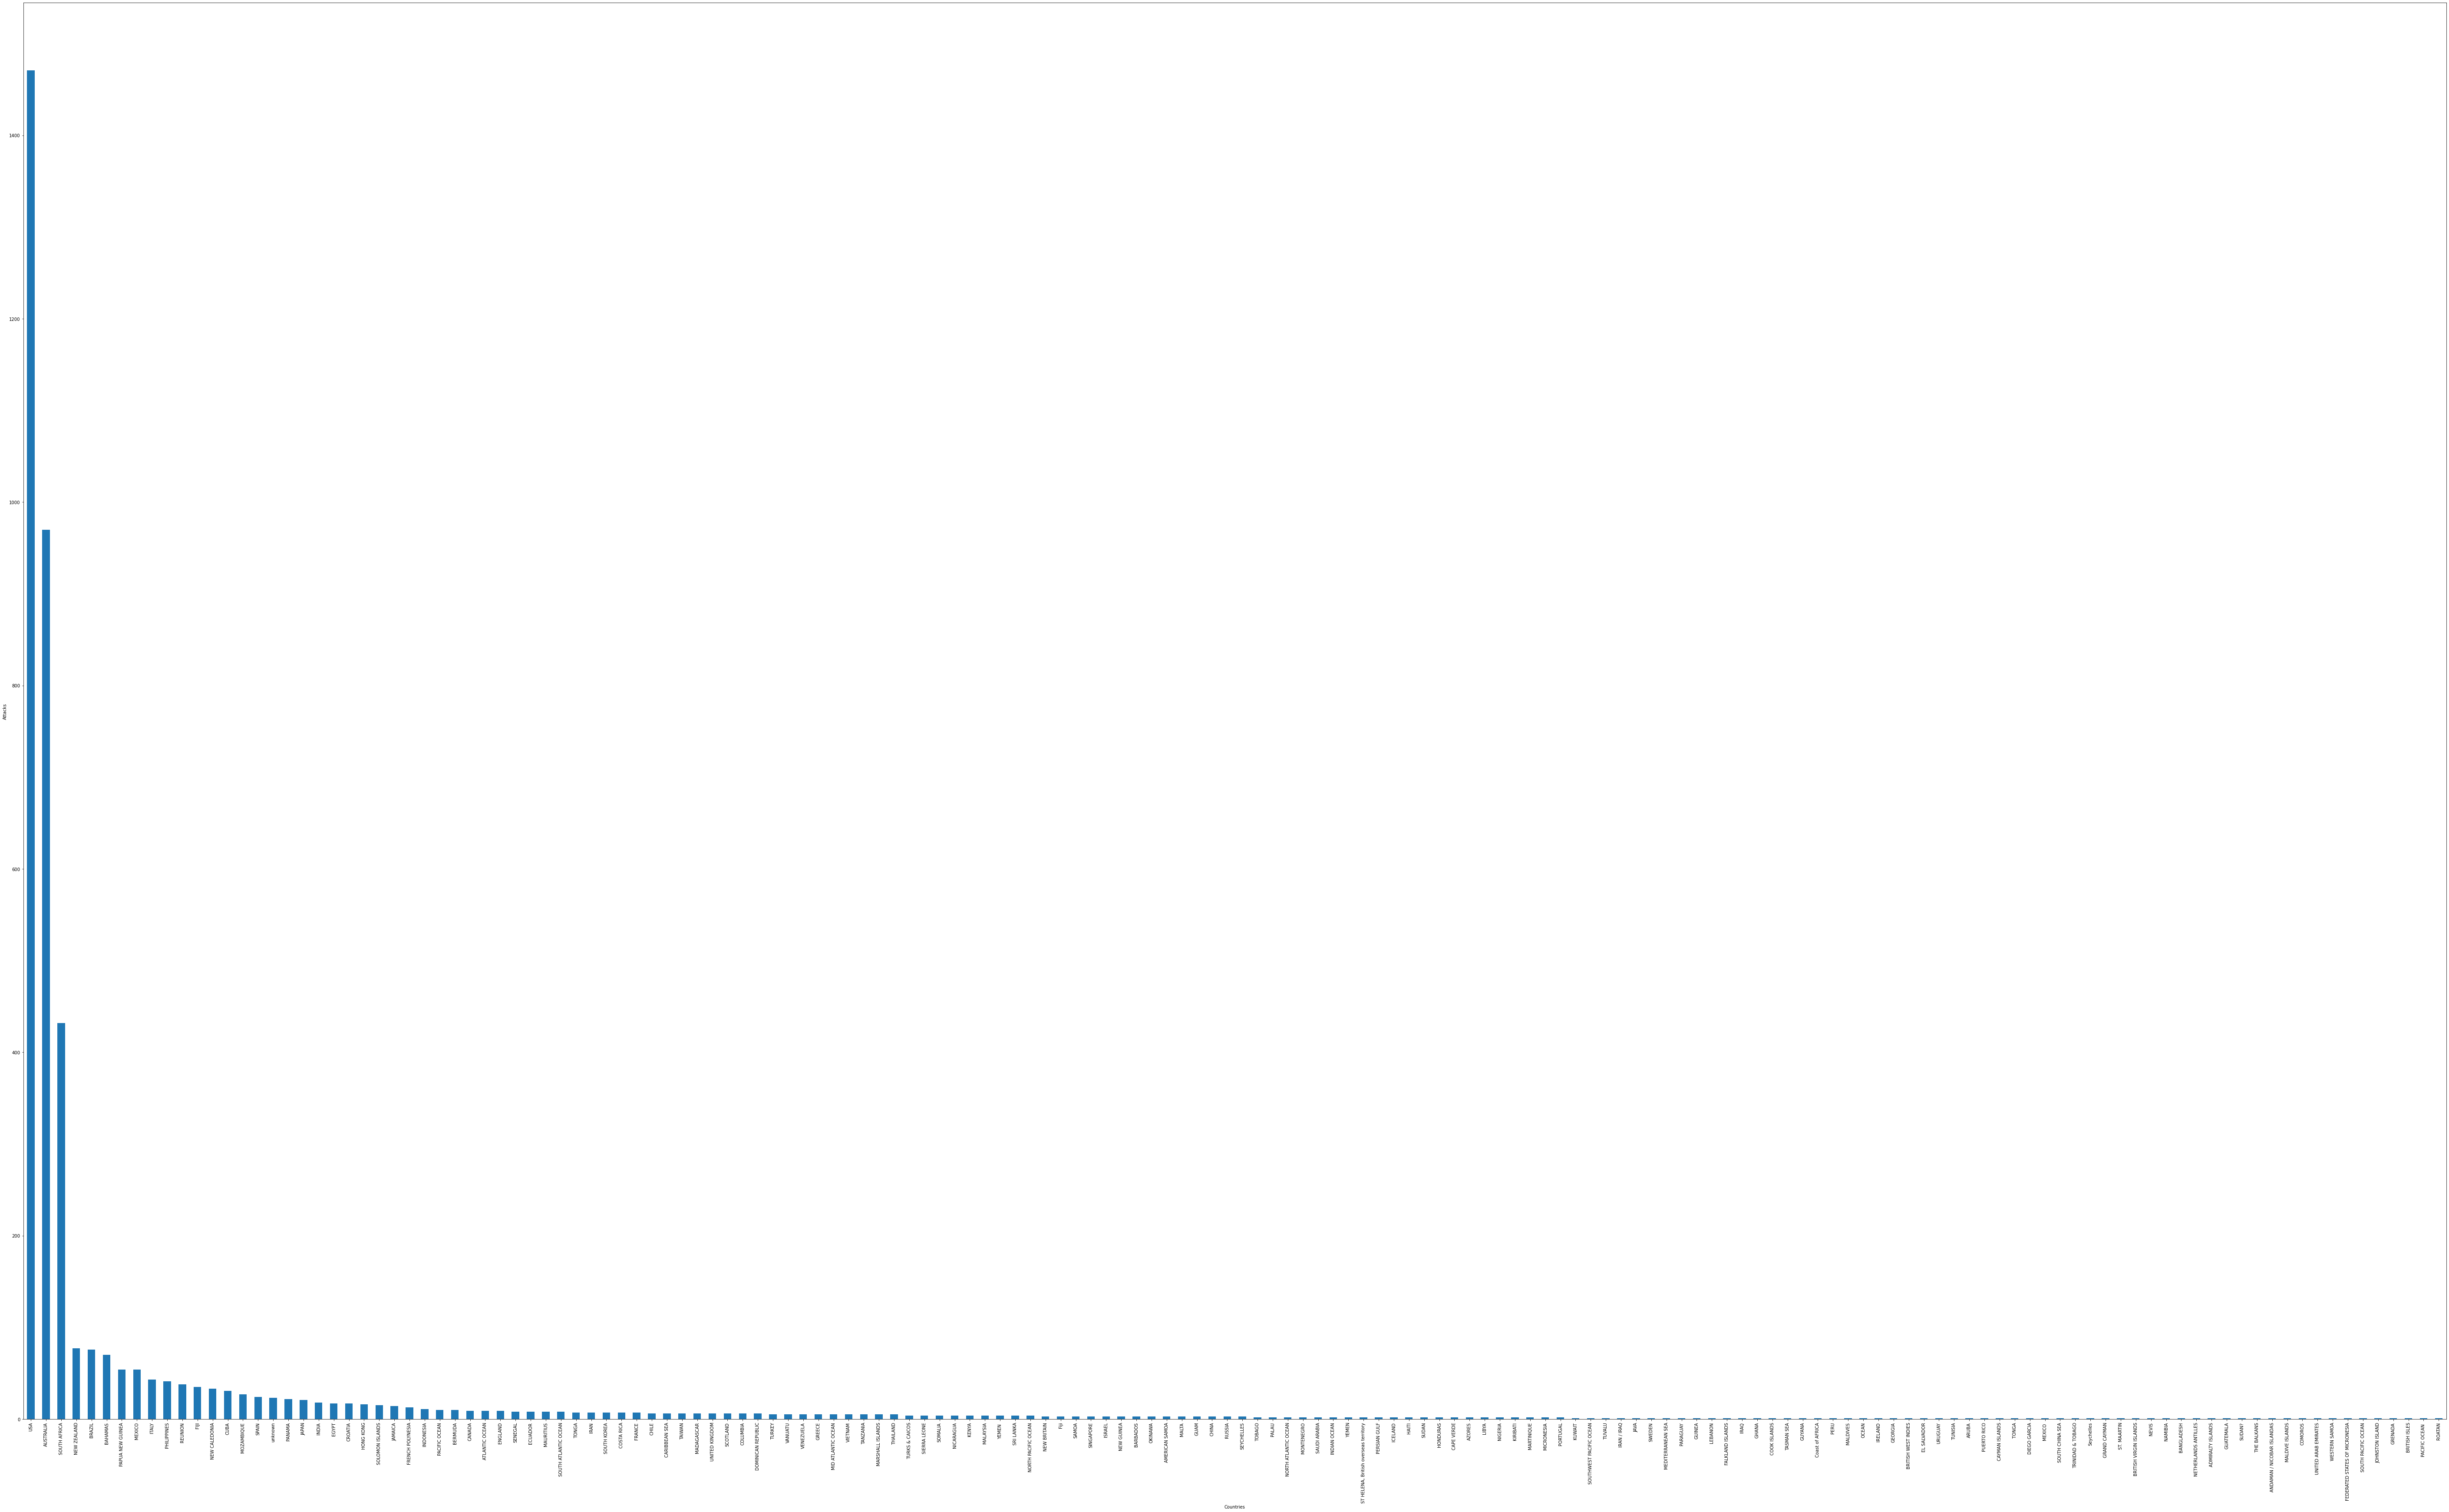

In [60]:
import pylab as plt
import seaborn as sns
%matplotlib inline  

plt.figure(figsize=(100, 60))
plt.ylabel('Attacks')
plt.xlabel('Countries')
sharks2.Country.value_counts().plot.bar();

USA es el país que más ataques recibió por partes de los tiburones.

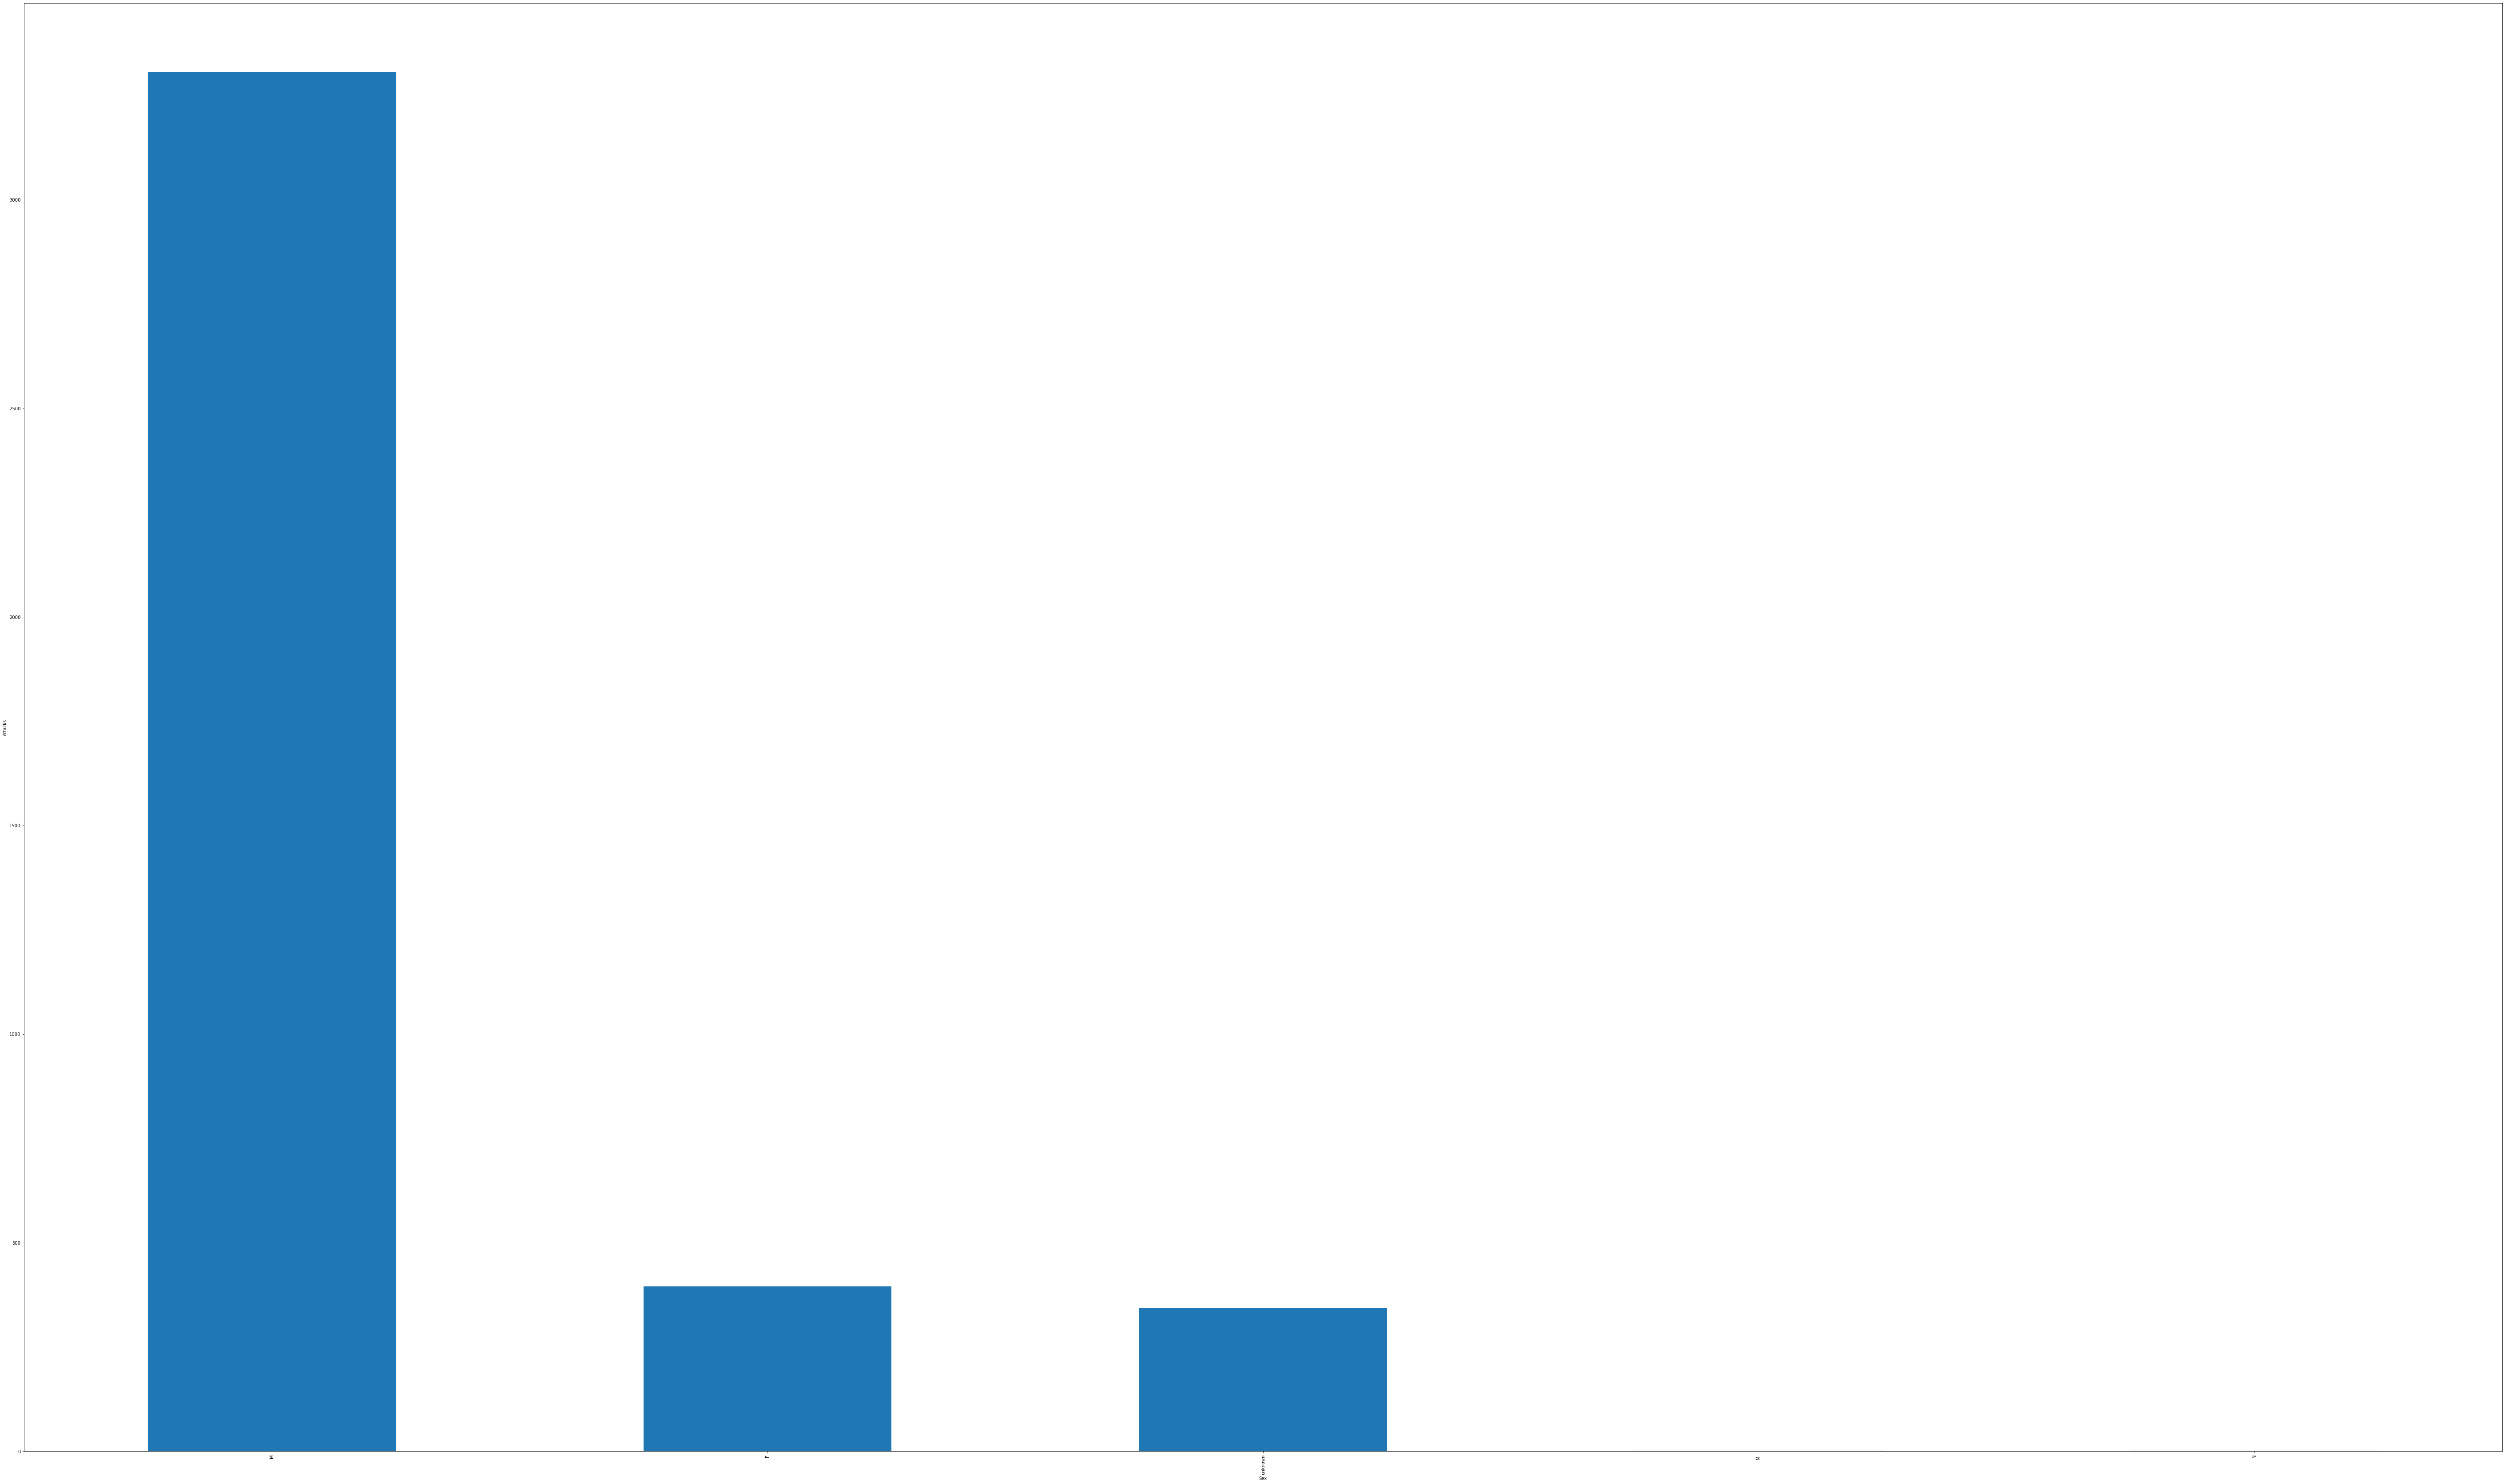

In [61]:
plt.figure(figsize=(100, 60))
plt.ylabel('Attacks')
plt.xlabel('Sex')
sharks2.Sex.value_counts().plot.bar();

Los tiburones atacan, en su mayoría, a hombres

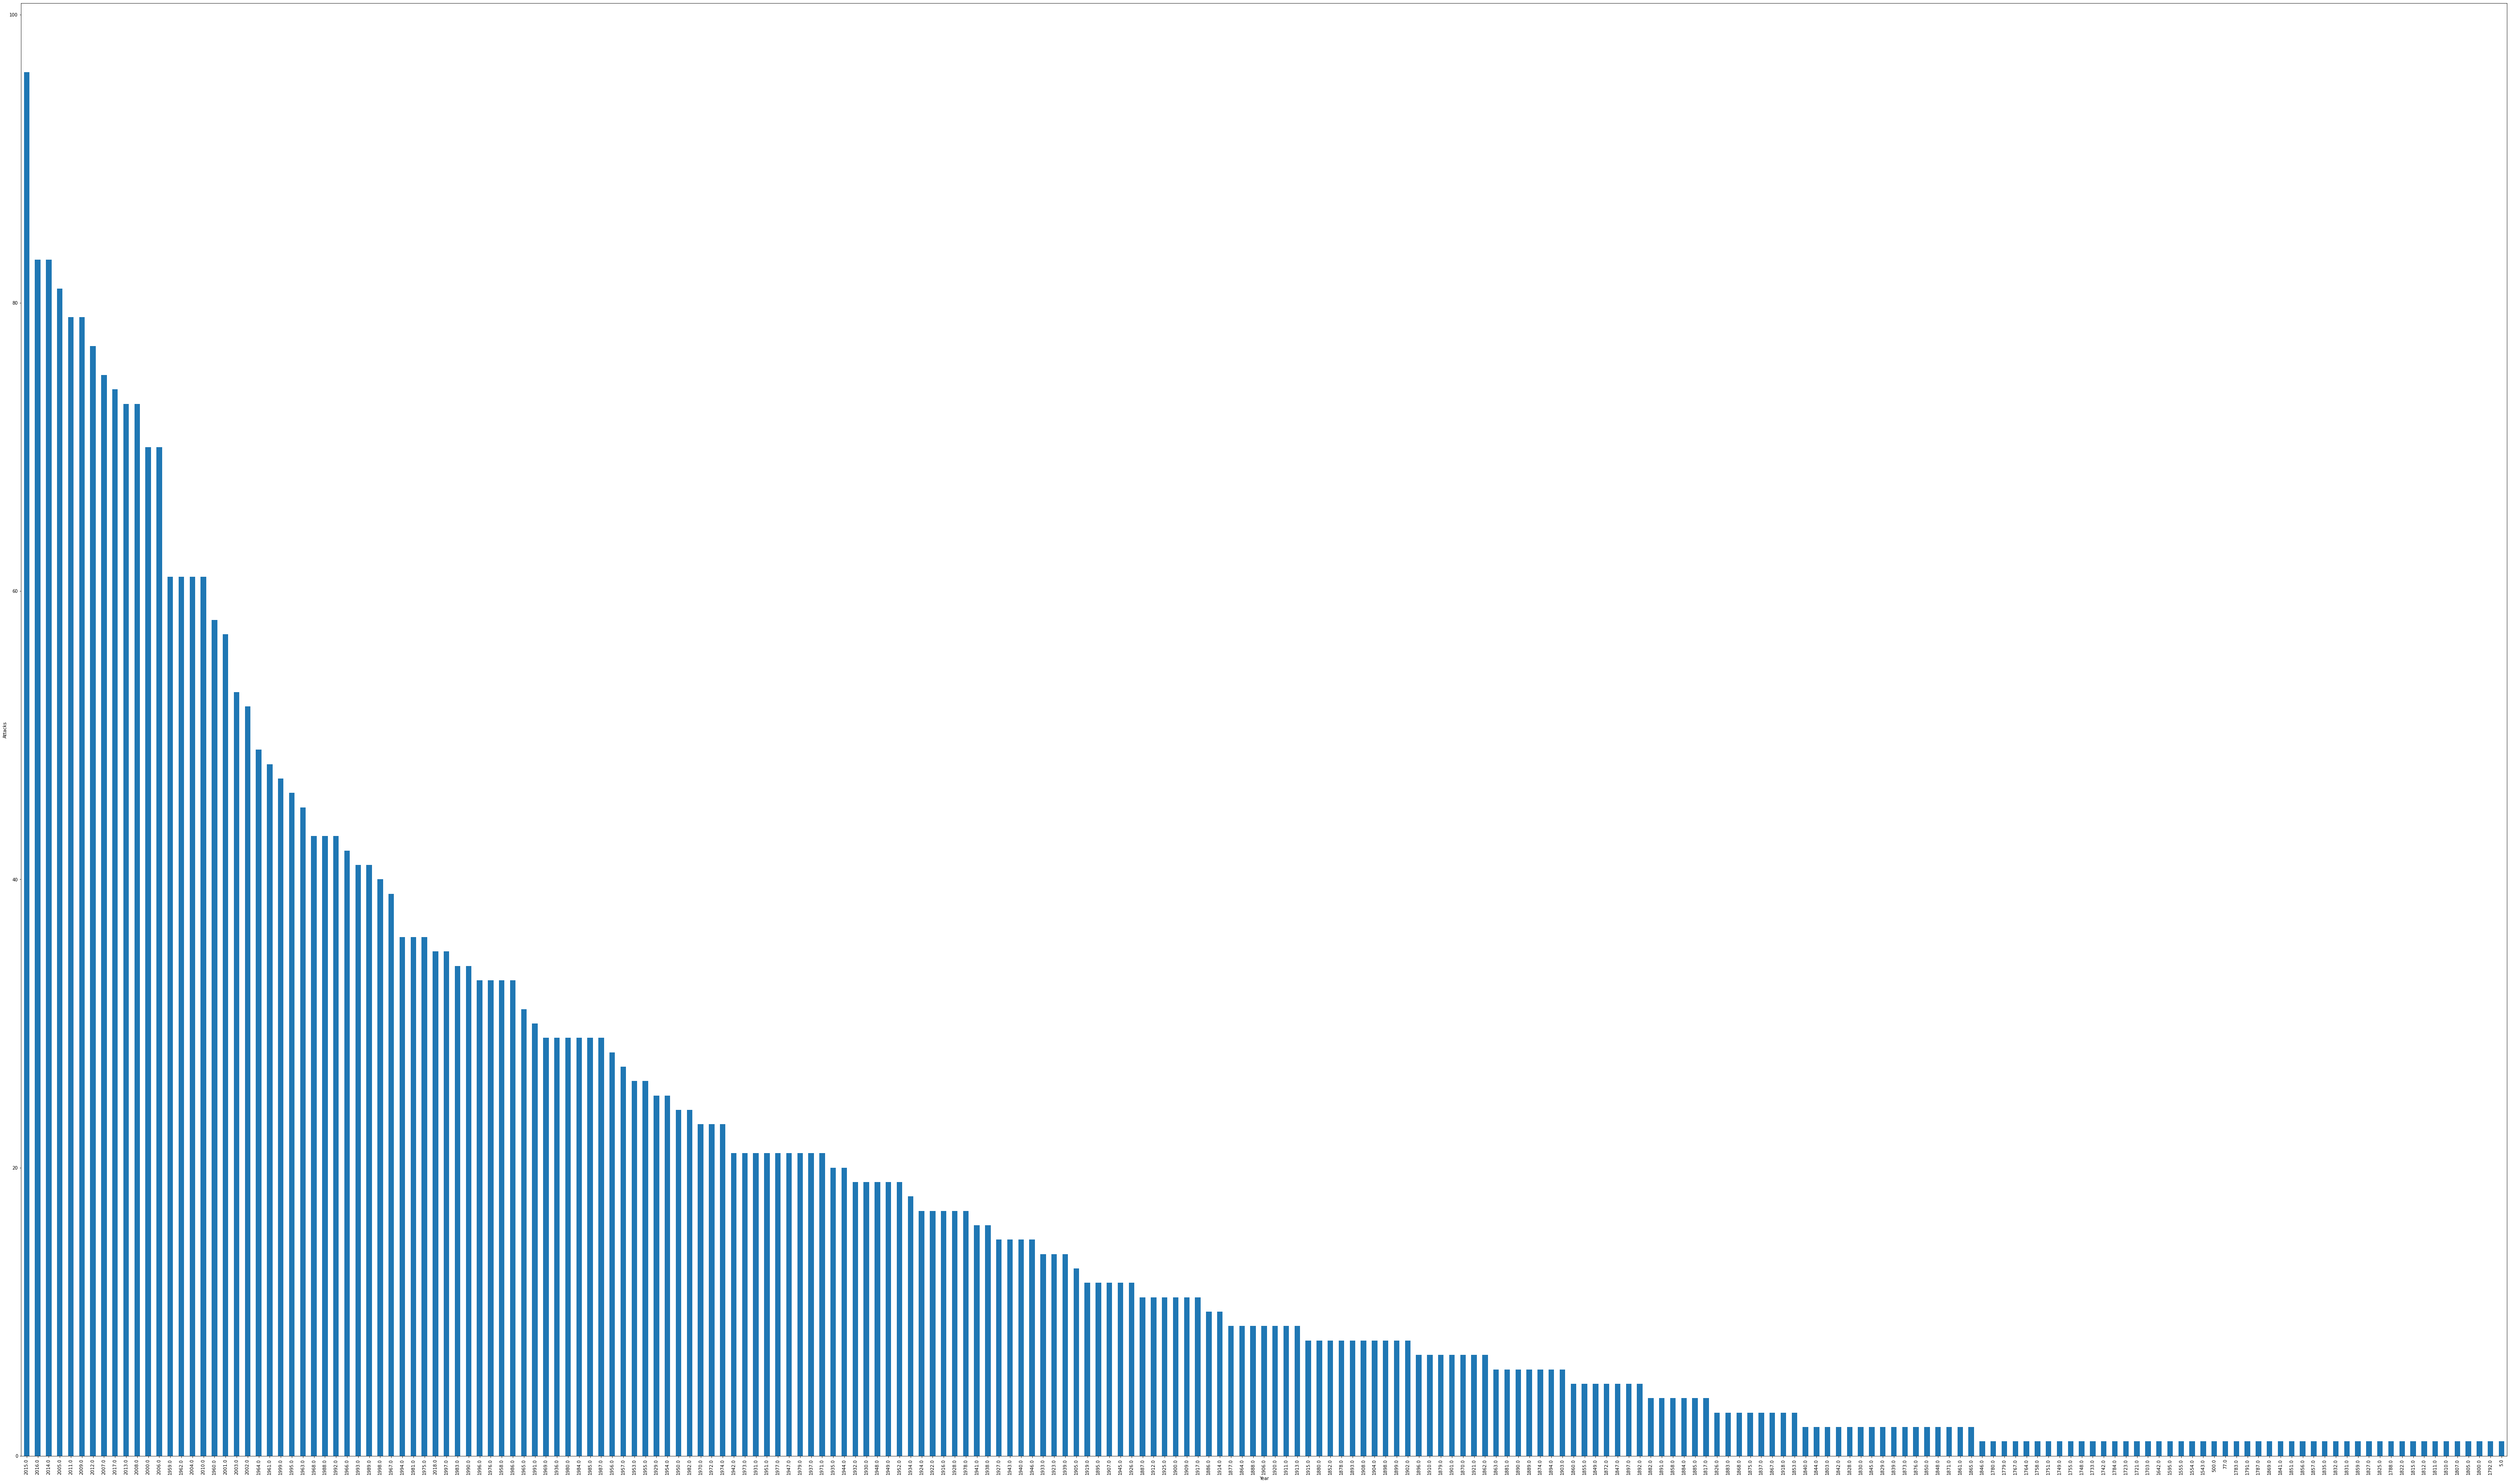

In [62]:
plt.figure(figsize=(100, 60))
plt.ylabel('Attacks')
plt.xlabel('Year')
sharks2.Year.value_counts().plot.bar();

2015 fue el año con mayor cantidad de ataques

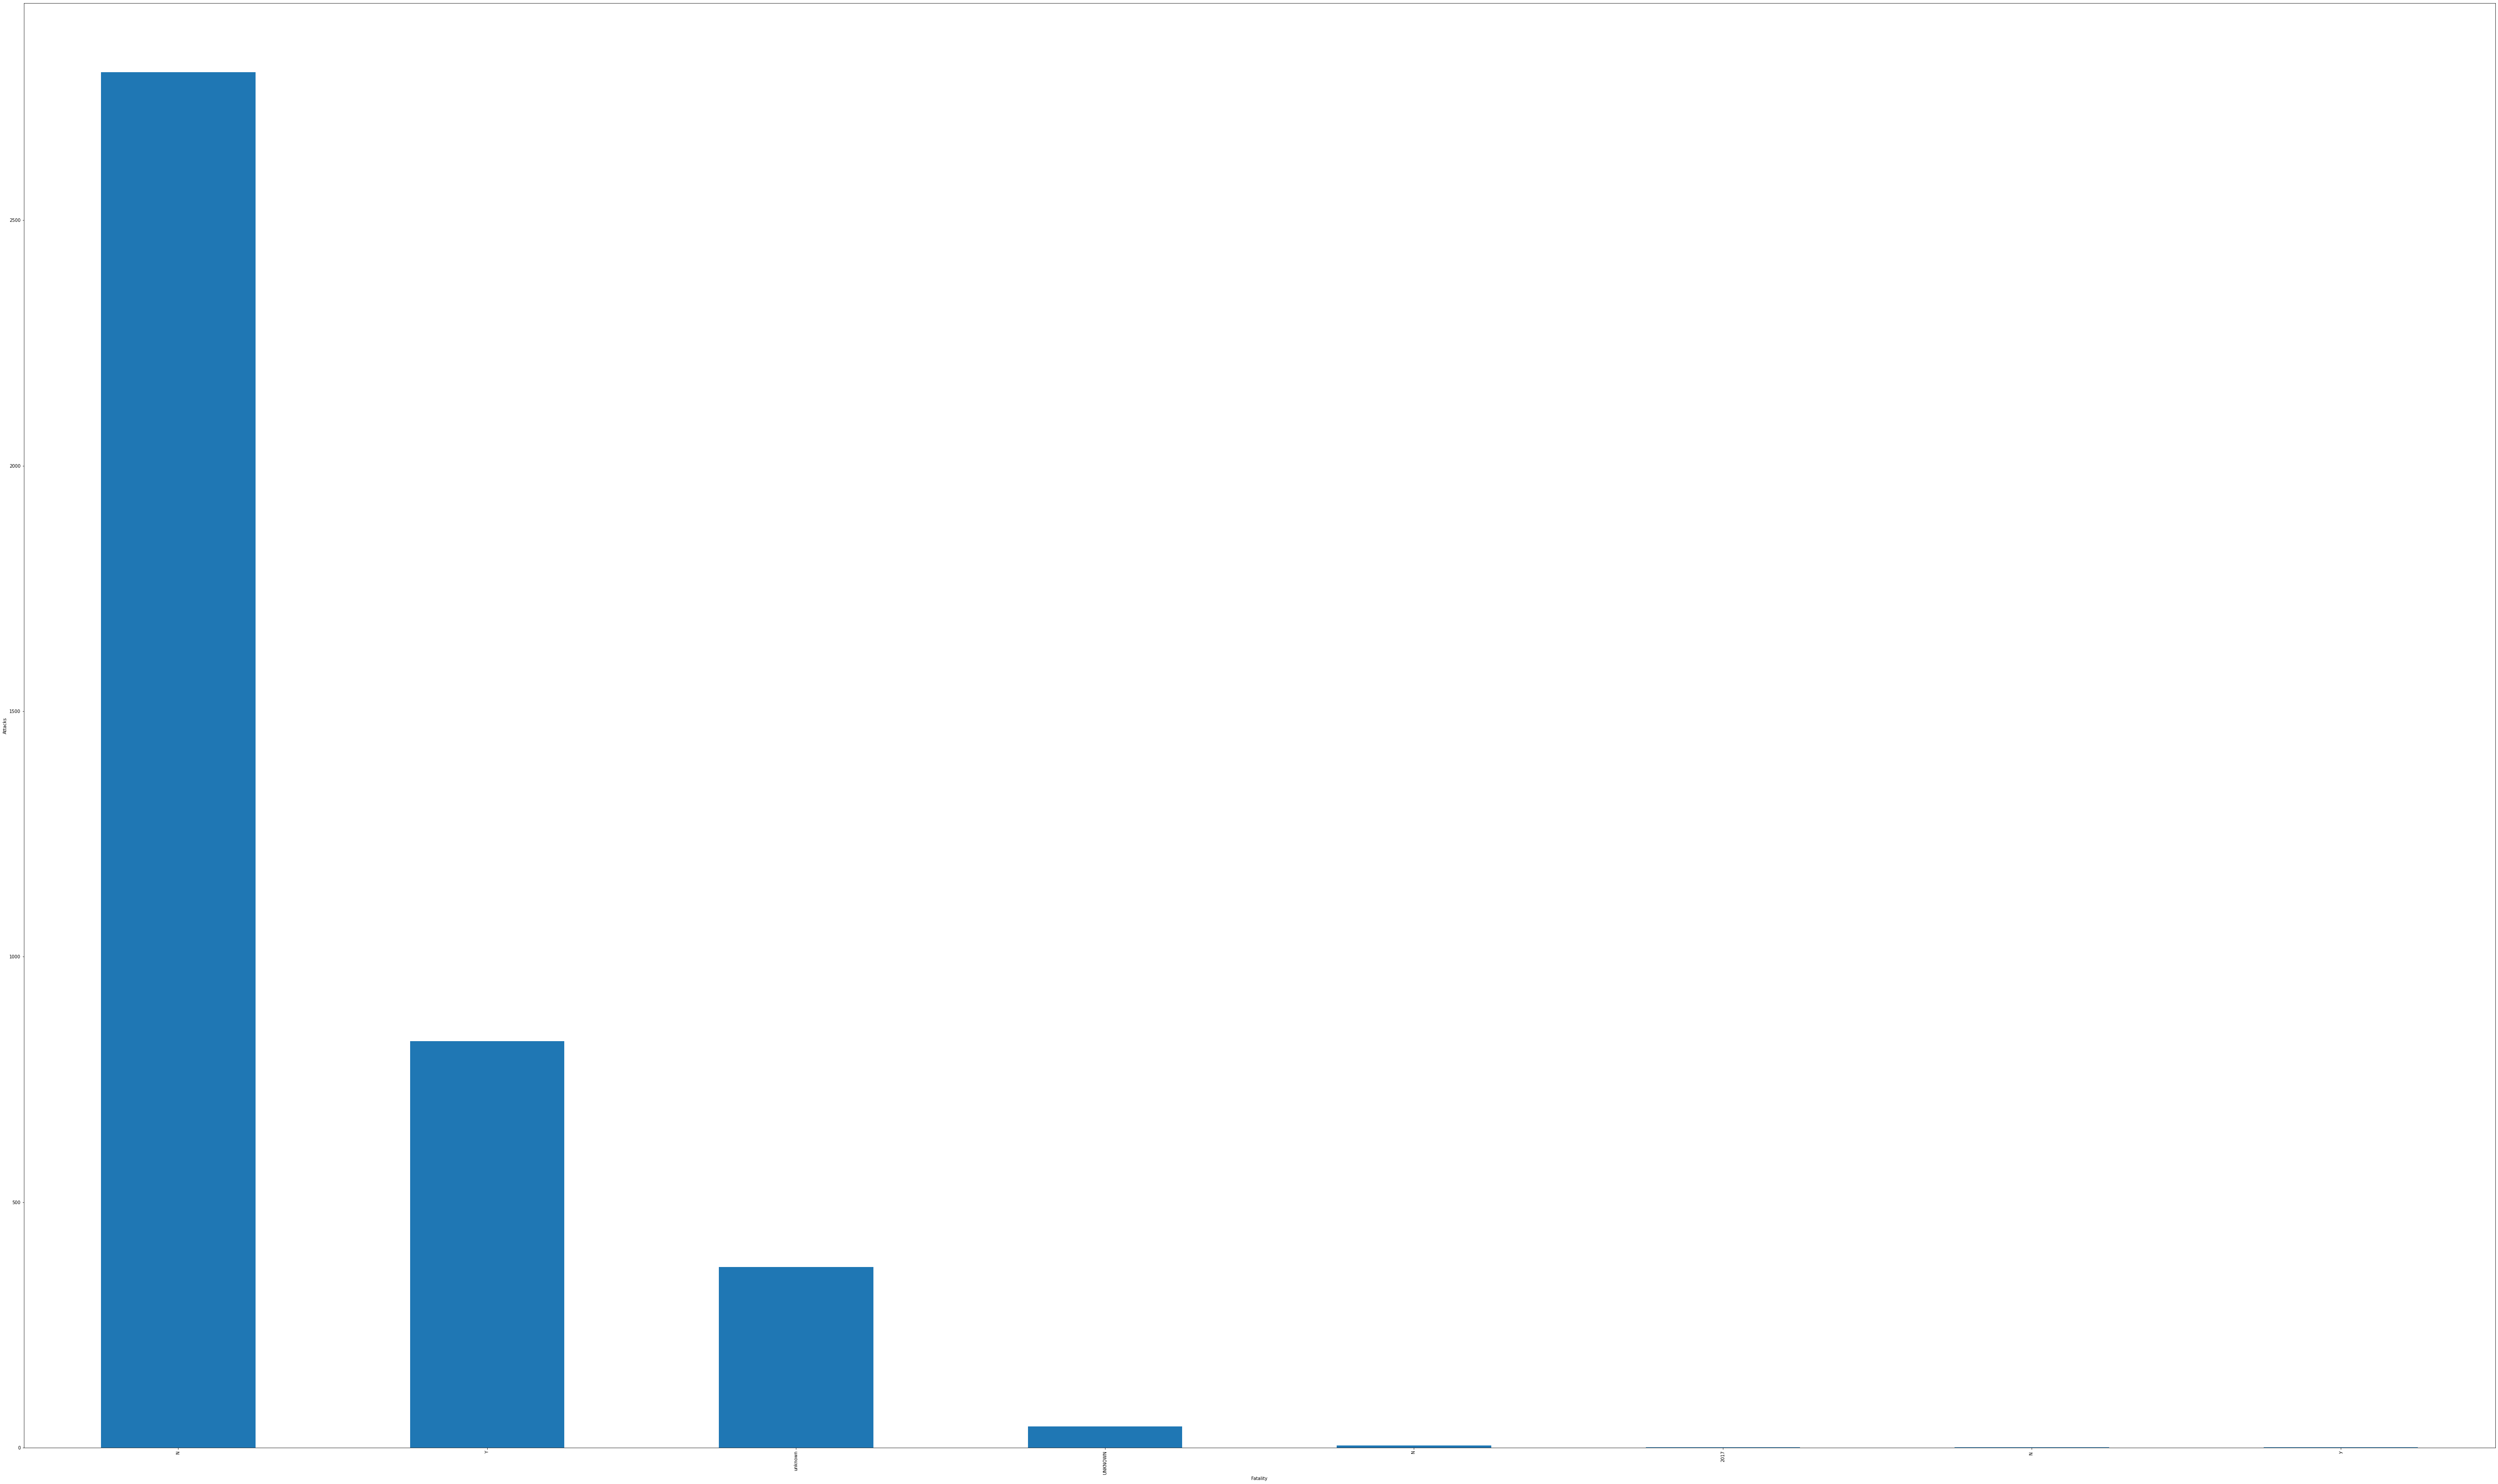

In [64]:
plt.figure(figsize=(100, 60))
plt.ylabel('Attacks')
plt.xlabel('Fatality')
sharks2['Fatal'].value_counts().plot.bar();

More than twice of the attacks weren't fatal